In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# INFORMACIÓN DEL DATASET
print(f"Número de propiedades: {df.shape[0]}")
print(f"Número de características: {df.shape[1]}")
print(f"Esto significa: {df.shape[0]} filas y {df.shape[1]} columnas")

Número de propiedades: 48895
Número de características: 16
Esto significa: 48895 filas y 16 columnas


In [4]:
# TIPOS DE DATOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# ESTADÍSTICAS BÁSICAS
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


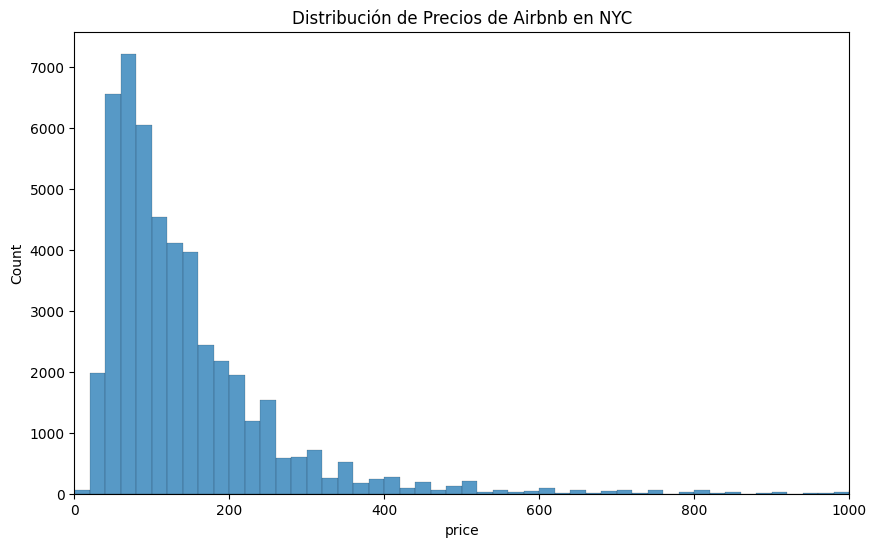

In [17]:
# HISTOGRAMA DE PRECIOS
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', bins=500)
plt.title('Distribución de Precios de Airbnb en NYC')
plt.xlim(0, 1000)
plt.show()

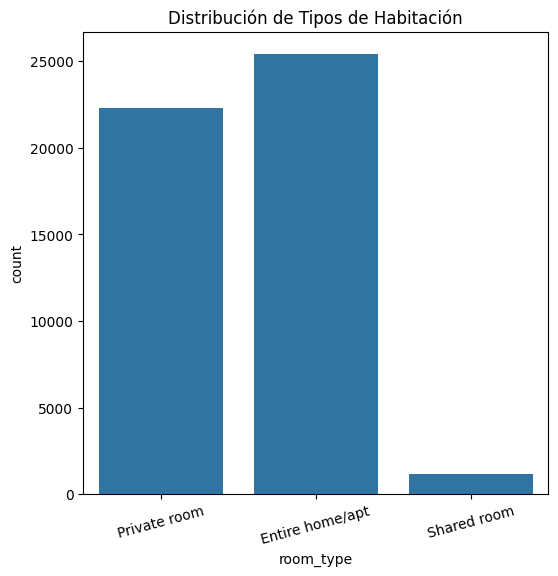

In [18]:
#TIPOS DE HABITACIÓN
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='room_type')
plt.title('Distribución de Tipos de Habitación')
plt.xticks(rotation=15)
plt.show()


(0.0, 500.0)

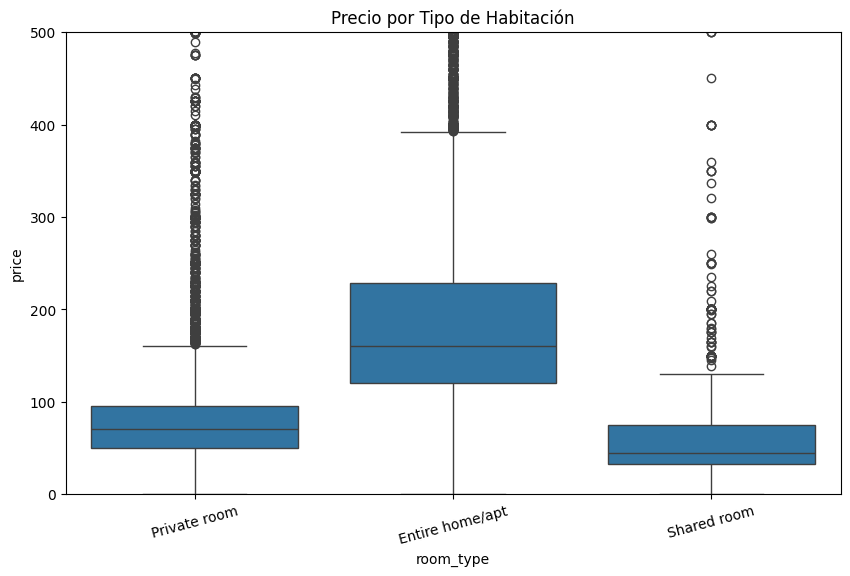

In [8]:
#PRECIO POR TIPO DE HABITACIÓN
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Precio por Tipo de Habitación')
plt.xticks(rotation=15)
plt.ylim(0, 500)

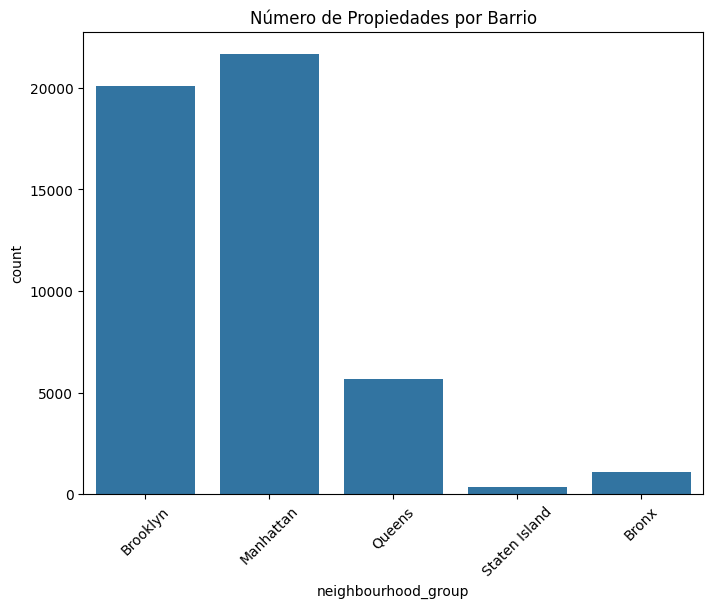

In [19]:
# DISTRIBUCIÓN POR BARRIOS
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='neighbourhood_group')
plt.title('Número de Propiedades por Barrio')
plt.xticks(rotation=45)
plt.show()

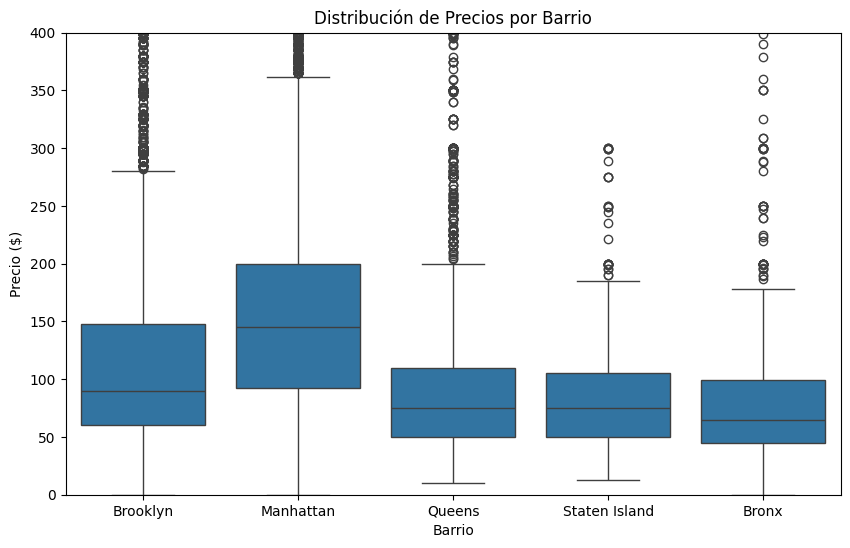

In [ ]:
# DISTRIBUCION DE PRECIOS POR BARRIO
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['price'] <= 500], x='neighbourhood_group', y='price')
plt.title('Distribución de Precios por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio ($)')
plt.ylim(0, 400)
plt.show()

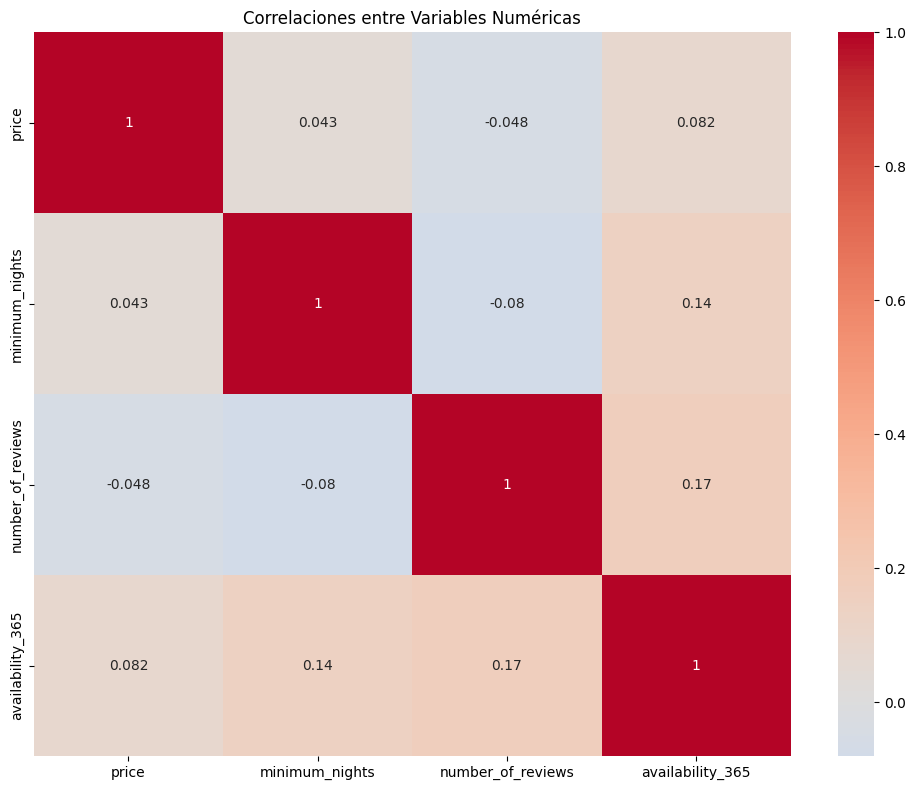

In [21]:
# MAPA DE CALOR DE CORRELACIONES
plt.figure(figsize=(10, 8))
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

In [23]:
# CÁLCULO DE PORCENTAJES PARA ANALISIS
print("CÁLCULO DE PORCENTAJES")

# 1. Porcentajes de tipos de habitación
print("1. PORCENTAJES DE TIPOS DE HABITACIÓN:")
porcentajes_habitacion = df['room_type'].value_counts(normalize=True) * 100
print(porcentajes_habitacion.round(1))

# 2. Porcentajes por barrios
print("2. PORCENTAJES POR BARRIOS:")
porcentajes_barrios = df['neighbourhood_group'].value_counts(normalize=True) * 100
print(porcentajes_barrios.round(1))

# 3. Medianas de precios por tipo
print("3. PRECIOS MEDIANOS POR TIPO:")
medianas_precios = df.groupby('room_type')['price'].median()
print(medianas_precios.round(0))

CÁLCULO DE PORCENTAJES
1. PORCENTAJES DE TIPOS DE HABITACIÓN:
room_type
Entire home/apt    52.0
Private room       45.7
Shared room         2.4
Name: proportion, dtype: float64
2. PORCENTAJES POR BARRIOS:
neighbourhood_group
Manhattan        44.3
Brooklyn         41.1
Queens           11.6
Bronx             2.2
Staten Island     0.8
Name: proportion, dtype: float64
3. PRECIOS MEDIANOS POR TIPO:
room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64


In [13]:
# VALORES FALTANTES
valores_faltantes = df.isnull().sum()
print("Cantidad de valores faltantes por columna:")
print(valores_faltantes)


Cantidad de valores faltantes por columna:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [14]:
# RESUMEN FINAL CONCLUSIONES
print("CONCLUSIONES FINALES DEL EDA")
print("1. Manhattan concentra 44.3% de propiedades y precios más altos")
print("2. 52% son casas enteras, 45.7% habitaciones privadas")
print("3. 20.6% de propiedades nunca han recibido reseñas")
print("4. Los precios tienen alta variabilidad (outliers extremos)")

CONCLUSIONES FINALES DEL EDA
1. Manhattan concentra 44.3% de propiedades y precios más altos
2. 52% son casas enteras, 45.7% habitaciones privadas
3. 20.6% de propiedades nunca han recibido reseñas
4. Los precios tienen alta variabilidad (outliers extremos)


In [15]:
# LIMPIEZA ANTES DEL ENTRENAMIENTO Y TEST
columnas_eliminar = ['id', 'name', 'host_name', 'last_review', 'host_id']
df_clean = df.drop(columns=columnas_eliminar)

print(f"Eliminadas columnas: {columnas_eliminar}")
print(f"Dataset original: {df.shape}")
print(f"Dataset limpio: {df_clean.shape}")

Eliminadas columnas: ['id', 'name', 'host_name', 'last_review', 'host_id']
Dataset original: (48895, 16)
Dataset limpio: (48895, 11)


In [16]:
# DIVIDIR EN TEST & TRAIN
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42)
print(f"Train: {train_df.shape}, Test: {test_df.shape}")

# GUARDAR
train_df.to_csv('/workspaces/machine-learning-python-template/data/processed/train.csv', index=False)
test_df.to_csv('/workspaces/machine-learning-python-template/data/processed/test.csv', index=False)

Train: (39116, 11), Test: (9779, 11)
